In [213]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns


In [214]:
df = pd.read_csv('datasets/movie_pred.csv', encoding = 'latin')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [216]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [217]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [218]:
df.dropna(inplace = True)

In [219]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [220]:
df['Votes'] = df['Votes'].str.replace(r'\W', '')
df['Votes'] = df['Votes'].astype(int)
df['Duration'] = df['Duration'].str.replace(' min', "").astype(int)

C:\Users\Zohaib\AppData\Local\Temp\ipykernel_10528\1665522076.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Votes'] = df['Votes'].str.replace(r'\W', '')


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 442.1+ KB


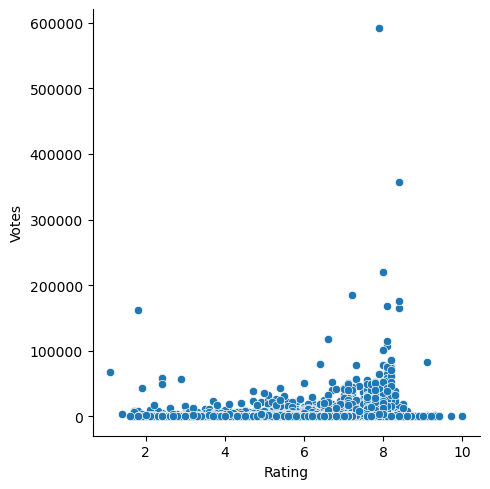

In [222]:
sns.relplot(data=df[['Rating', 'Votes']], x="Rating", y="Votes")

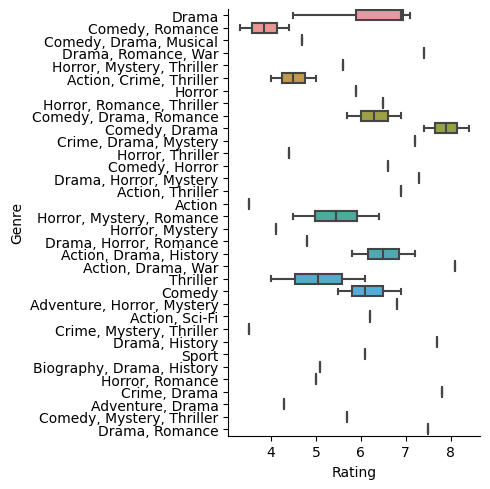

In [223]:
sns.catplot(data=df[['Genre', 'Rating']][:50], x="Rating", y="Genre", kind="box")

In [224]:
lbl = LabelEncoder()

In [225]:
df['Genre'] = lbl.fit_transform(df['Genre'])
df['Director'] = lbl.fit_transform(df['Director'])
df['Actor 1'] = lbl.fit_transform(df['Actor 1'])
df['Actor 2'] = lbl.fit_transform(df['Actor 2'])
df['Actor 3'] = lbl.fit_transform(df['Actor 3'])

In [226]:
df.drop(columns = ['Name', 'Year', 'Duration'], inplace = True)

In [227]:
X = df.drop(columns = ['Rating'])
y = df['Rating']

In [228]:
print(X.shape)
print(y.shape)

(5659, 6)
(5659,)


In [229]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4527, 6) (4527,)
(1132, 6) (1132,)


In [230]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [231]:
pred = model.predict(x_test)

In [233]:
R2 = r2_score(y_test, pred)
R2

0.04157531368857936